<a href="https://colab.research.google.com/github/S-Devisri01/Python-colab/blob/main/STUDENT_PERFORMANCE_PREDICTION_%E2%80%93_ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Loaded Successfully ✅
Shape: (395, 33)
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Dataset Info:
<class 'pandas.core.frame.

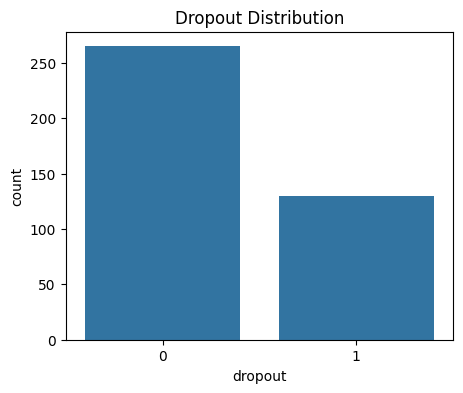

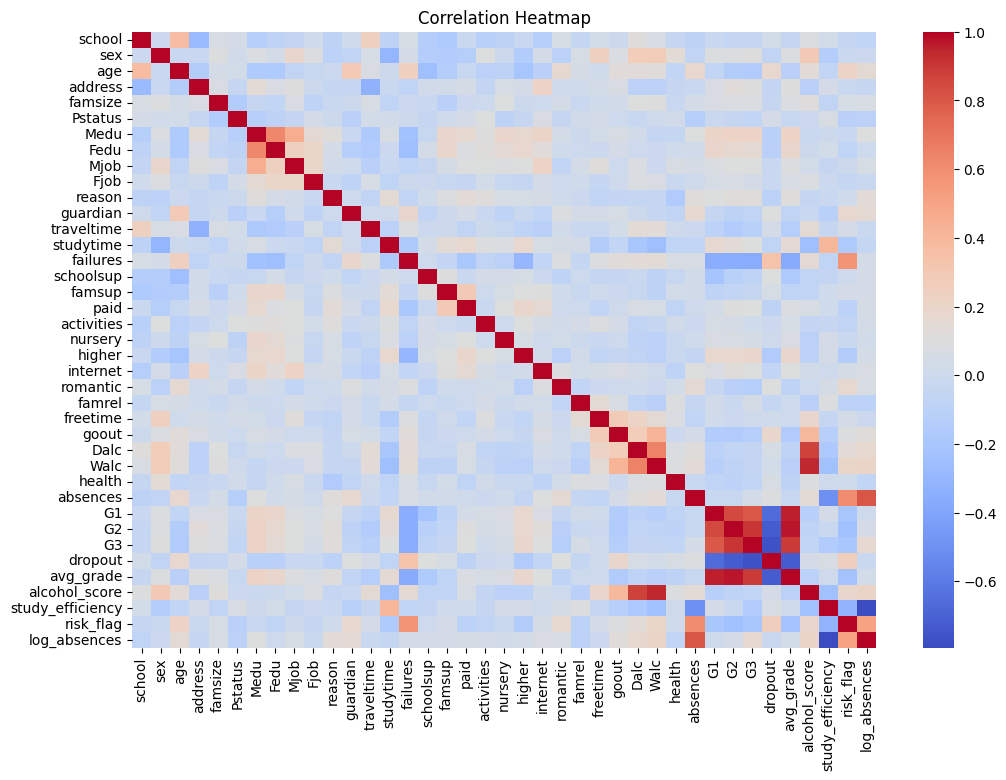


Logistic Regression
----------------------------------------
Accuracy: 0.8860759493670886
Confusion Matrix:
 [[49  4]
 [ 5 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92        53
           1       0.84      0.81      0.82        26

    accuracy                           0.89        79
   macro avg       0.87      0.87      0.87        79
weighted avg       0.89      0.89      0.89        79


Decision Tree
----------------------------------------
Accuracy: 0.8481012658227848
Confusion Matrix:
 [[48  5]
 [ 7 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89        53
           1       0.79      0.73      0.76        26

    accuracy                           0.85        79
   macro avg       0.83      0.82      0.82        79
weighted avg       0.85      0.85      0.85        79


Random Forest
-------------------------------

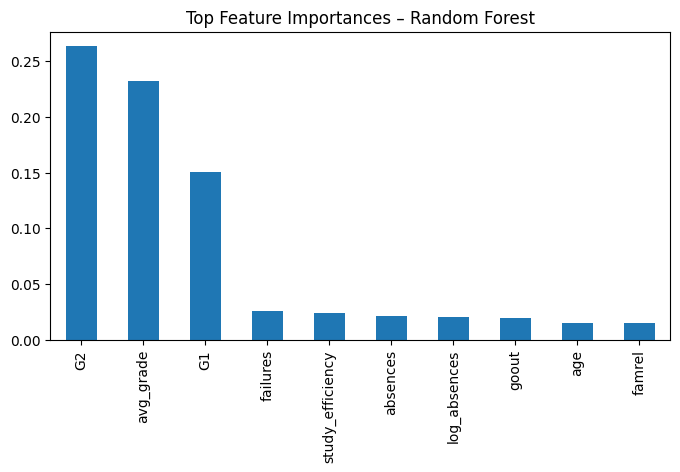


New Student Prediction:
⚠️ DROP OUT

🎉 PROJECT COMPLETED SUCCESSFULLY!

• Dataset          : Student Performance (UCI)
• Problem Type     : Classification
• Feature Engg     : ✔ Applied
• Best Model       : Random Forest
• Business Value   : Early dropout risk detection



In [4]:
# ============================================================
# 🎓 STUDENT DROPOUT PREDICTION – COMPLETE ML PROJECT
# (Corrected Dataset | Feature Engineering | Single File)
# ============================================================

# =========================
# 1️⃣ IMPORT LIBRARIES
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# =========================
# 2️⃣ LOAD DATASET
# =========================
df = pd.read_csv('/content/student_performance_dataset.csv')

print("Dataset Loaded Successfully ✅")
print("Shape:", df.shape)
print(df.head())

# =========================
# 3️⃣ TARGET CREATION (DROPOUT)
# =========================
# Dropout definition:
# Final grade (G3) < 10 → Dropout (1), else Continue (0)

df['dropout'] = (df['G3'] < 10).astype(int)

# =========================
# 4️⃣ DATA UNDERSTANDING
# =========================
print("\nDataset Info:")
df.info()

print("\nStatistical Summary:")
print(df.describe())

# =========================
# 5️⃣ MISSING VALUE CHECK
# =========================
print("\nMissing Values:")
print(df.isnull().sum())

# =========================
# 6️⃣ FEATURE ENGINEERING
# =========================

# 🔹 1. Academic Performance Average
df['avg_grade'] = (df['G1'] + df['G2']) / 2

# 🔹 2. Alcohol Consumption Score
df['alcohol_score'] = (df['Dalc'] + df['Walc']) / 2

# 🔹 3. Study Efficiency
df['study_efficiency'] = df['studytime'] / (df['absences'] + 1)

# 🔹 4. Risk Flag (Failures + Absences)
df['risk_flag'] = (
    (df['failures'] >= 2) |
    (df['absences'] > 10)
).astype(int)

# 🔹 5. Log Transform Absences
df['log_absences'] = np.log1p(df['absences'])

print("\nFeature Engineering Applied ✅")
print(df[['avg_grade','alcohol_score','study_efficiency','risk_flag','log_absences']].head())

# =========================
# 7️⃣ ENCODE CATEGORICAL FEATURES
# =========================
cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# =========================
# 8️⃣ EXPLORATORY DATA ANALYSIS
# =========================

# Target distribution
plt.figure(figsize=(5,4))
sns.countplot(x='dropout', data=df)
plt.title("Dropout Distribution")
plt.show()

# Correlation heatmap (numeric only)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# =========================
# 9️⃣ FEATURE & TARGET
# =========================
X = df.drop(['dropout', 'G3'], axis=1)
y = df['dropout']

# =========================
# 🔟 TRAIN TEST SPLIT
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# =========================
# 1️⃣1️⃣ FEATURE SCALING
# =========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =========================
# 1️⃣2️⃣ MODEL TRAINING
# =========================

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# =========================
# 1️⃣3️⃣ MODEL EVALUATION
# =========================
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name}")
    print("-" * 40)
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, lr_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)

# =========================
# 1️⃣4️⃣ FEATURE IMPORTANCE
# =========================
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,4))
feature_importance.head(10).plot(kind='bar')
plt.title("Top Feature Importances – Random Forest")
plt.show()

# =========================
# 1️⃣5️⃣ NEW STUDENT PREDICTION
# =========================
new_student = X.iloc[[0]]  # sample structure
prediction = rf.predict(new_student)

print("\nNew Student Prediction:")
print("⚠️ DROP OUT" if prediction[0] == 1 else "✅ CONTINUE")

# =========================
# 1️⃣6️⃣ CONCLUSION
# =========================
print("""
🎉 PROJECT COMPLETED SUCCESSFULLY!

• Dataset          : Student Performance (UCI)
• Problem Type     : Classification
• Feature Engg     : ✔ Applied
• Best Model       : Random Forest
• Business Value   : Early dropout risk detection
""")
